# Making Marker Grids

In [1]:
%matplotlib inline

import numpy as np

from ar_tracking_tools.bundle_pdf_utils import makeBundlePdf, IN2CM
from ar_tracking_tools.bundle_xml_utils import makeBundleXml
from ar_tracking_tools.marker_utils import makeMarkerGrid, makeMultiResolutionGrid

from IPython.display import IFrame
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 20, 12

## Creating a simple grid 

### Set the physical dimensions of your grid in cm

In [2]:
height = 20.
width  = 20.

### Set how much boarder margin you want around the physical dimension in cm

In [3]:
margin = 2

### Set how wide you want your AR Tags in cm

In [4]:
marker_size = 7

### Set how many rows and columns of tags you want

In [5]:
rows = 2
cols = 2

### Generate the marker center points

In [6]:
pts = makeMarkerGrid(rows, cols, marker_size, margin = margin, width = width, height=height)

### Set the index of the first AR Tag

In [7]:
start_tag_index = 70

### Set the text size, in cm, for the annotations. Set to None if you don't want annotations

In [8]:
text_size = .35

### Set the paper size in cm
If it is not set, then it prints to a single sheet of the required size. 

If more than one sheet is required, it automatically tiles with overlap and alignment markers.

In [9]:
paper_size = (8.5*IN2CM, 11*IN2CM)

### Create and save the marker pdf (pdf visualization only works in Firefox)

In [10]:
pdf = makeBundlePdf([pts], marker_size=marker_size, 
                    start_index = start_tag_index,
                    paper_size = paper_size,
                    text_size = text_size)
pdf.output('example_bundles/simple_grid.pdf', 'F')

IFrame('example_bundles/simple_grid.pdf', width=600, height=300)

### Create and save the bundle xml file

In [11]:
xml_str = makeBundleXml([pts], marker_size=marker_size, start_index = start_tag_index)
with open('example_bundles/simple_grid.xml', 'w') as f:
    f.write(xml_str)

## Multi-Resolution Marker Bundles

### Set the physical width of the grid in cm

In [12]:
mrg_width = 18

### Set how much space you want between the tags

In [13]:
spacing = 1

### Set how many columns you want in the upper left quadrant and the upper right quadrant

In [14]:
cols_ul = 1
cols_ur = 2

### Generate and save the target pdf and xml
The multi-resolutions bundles will have larger margins as half the largest tag width is added to the closest point. To compensate, you can set a negative printing margin. This margins is only used for ploting, and does not effect the tag coordinates.

In [15]:
mrg_pts, mrg_sizes = makeMultiResolutionGrid(mrg_width, spacing = spacing, 
                                             cols_ul=cols_ul, cols_ur=cols_ur)
start_tag_index = 30
pdf = makeBundlePdf([mrg_pts], marker_size=mrg_sizes,
                    margin = -1,
                    start_index = start_tag_index, 
                    text_size = .15,
                    paper_size = paper_size,)
xml_str = makeBundleXml([mrg_pts], 
                        start_index = start_tag_index,
                        marker_size=mrg_sizes)

pdf.output('example_bundles/mrg_bundle.pdf', 'F')
with open('example_bundles/mrg_bundle.xml', 'w') as f:
    f.write(xml_str)
    
IFrame('example_bundles/mrg_bundle.pdf', width=600, height=300)

## 3D Marker Bundles

### Drawer Marker Bundle (defining points in 3D)

In [16]:
marker_size = 7
margin = 2
height = 36.5
width  = 76.5
depth  = 20

top_pts = makeMarkerGrid(3,6, marker_size, margin, corner=(0,0,0), width = width, height=height)
left_pts = makeMarkerGrid(2,3, marker_size, margin, corner=(0,0,0), height=height, depth=depth)
right_pts = makeMarkerGrid(2,3, marker_size, margin, corner=(width,0,0), height=height, depth=depth)

point_sets = [top_pts, left_pts, right_pts]

pdf = makeBundlePdf(point_sets, marker_size=marker_size, start_index = 0, text_size = .35)
xml_str = makeBundleXml(point_sets, marker_size=marker_size, start_index = 0)

pdf.output('example_bundles/drawer_bundle.pdf', 'F')
with open('example_bundles/drawer_bundle.xml', 'w') as f:
    f.write(xml_str)

### Bag Marker Bundle (points in 2D and then folding)

In [17]:
from ar_tracking_tools.geometry_utils import foldPoints

mrg_width = 18
spacing = 1
cols_ul = 1
cols_ur = 2
bag_width = 25.5
edge_margin = (bag_width-mrg_width)/2.

mrg_pts, mrg_sizes = makeMultiResolutionGrid(mrg_width, spacing = spacing, 
                                             cols_ul = cols_ul, cols_ur = cols_ur)

top_mrg_pts = mrg_pts + np.array([edge_margin, -edge_margin, 0])

back_mrg_pts = mrg_pts + np.array([edge_margin, bag_width - edge_margin, 0])
back_edge = ((0,0,0), (bag_width,0,0), 90*np.pi/180.)
back_mrg_pts = foldPoints(back_mrg_pts, back_edge, reverse=True)

left_mrg_pts = mrg_pts + np.array([-bag_width + edge_margin, -edge_margin, 0])
left_edge = ((0,0,0), (0,-mrg_width,0), -90*np.pi/180.)
left_mrg_pts = foldPoints(left_mrg_pts, left_edge, reverse=True)

right_mrg_pts = mrg_pts + np.array([bag_width + edge_margin, -edge_margin, 0])
right_edge = ((bag_width,0,0), (bag_width,-mrg_width,0), 90*np.pi/180.)
right_mrg_pts = foldPoints(right_mrg_pts, right_edge, reverse=True)

point_sets = [top_mrg_pts, back_mrg_pts, left_mrg_pts, right_mrg_pts]
edges = [None, back_edge, left_edge, right_edge]
marker_sizes = np.concatenate([mrg_sizes, mrg_sizes, mrg_sizes, mrg_sizes])

pdf = makeBundlePdf(point_sets, marker_size=marker_sizes, start_index = 30, text_size = .15)
xml_str = makeBundleXml(point_sets, marker_size=marker_sizes, start_index = 30)

pdf.output('example_bundles/bag_bundle.pdf', 'F')
with open('example_bundles/bag_bundle.xml', 'w') as f:
    f.write(xml_str)

### If you want to check your XML, you can visualize the markers in 3D
Corners are colored in ordered red, blue, green, yellow

<IPython.core.display.Javascript object>


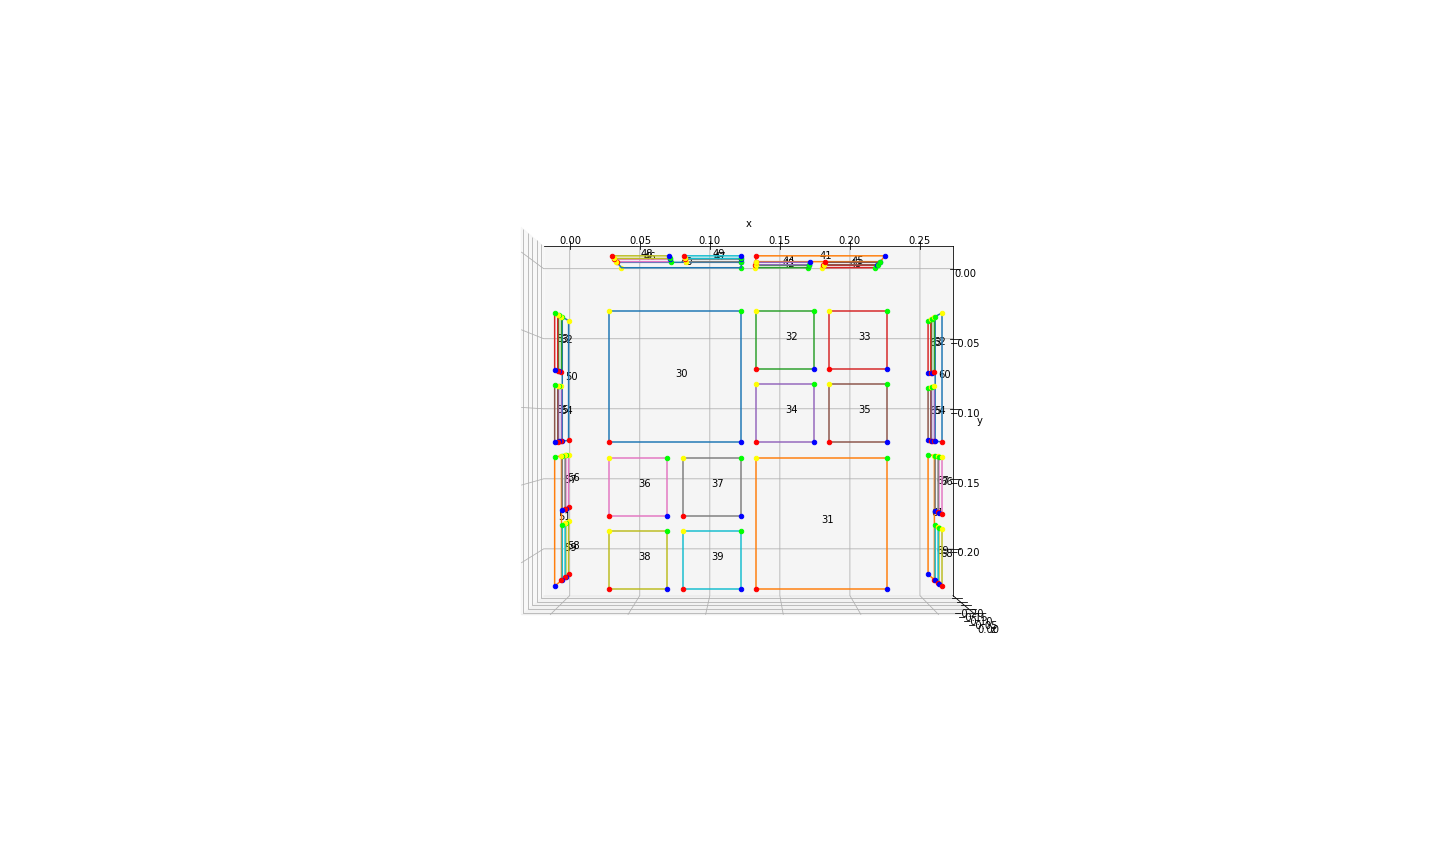

In [18]:
%matplotlib notebook
from ar_tracking_tools.bundle_visualization_utils import visualizeBundleXML

ax = visualizeBundleXML('example_bundles/bag_bundle.xml')